In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
np.random.seed(1000)
rand_uni = np.random.rand(5000)

## Random samples from Uniform distribution

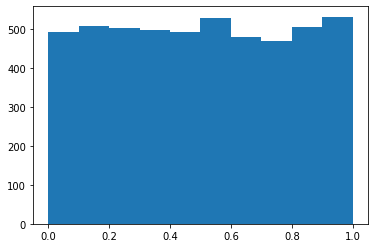

In [ ]:
plt.hist(rand_uni);

## Converting Uniform to Exponential distribution

The PDF of Exponential distribution is given by:

$$ f(x;\lambda) = \lambda e^{-\lambda x}, x\ge 0 $$

using the CDF Inverse transformation method,

$$ x = -ln(y)$$
the resulting Exponential distribution is with $\lambda = 1$

In [ ]:
rand_exp = -np.log(rand_uni)

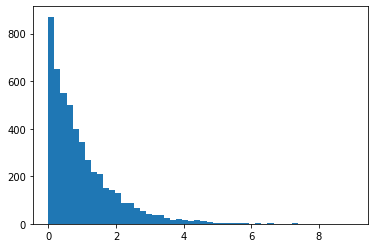

In [ ]:
plt.hist(rand_exp,bins=50);


### Generating Samples for Half-Normal Distribution

The code uses **acceptance-rejection sampling** to generate random samples from the half-normal distribution.

1. **Target and Proposal Distributions**:
   - **Target Distribution ($f_{X}(x)$)**: The PDF of the half-normal distribution is:
     $$
     f_{X}(x) = \sqrt{\frac{2}{\pi}} \cdot e^{-0.5x^2}, \quad x \geq 0
     $$
   - **Proposal Distribution ($g_{Y}(x)$)**: The algorithm uses an **exponential distribution**:
     $$
     g_{Y}(x) = e^{-x}, \quad x \geq 0
     $$

2. **Rejection Sampling Technique**:
   - To sample from the half-normal distribution, the code iteratively:
     - Generates $Y \sim Exp(1)$ from a uniform random variable $U$ using:
        $$
       Y = -\ln(U), \quad U \sim Uni[0,1]
       $$
     - Accepts \(Y\) as a sample for the half-normal distribution if:
       $$
       Z \leq \frac{f_{X}(x)}{e^{-x}}, \quad Z \sim Uni[0,1]
       $$
   - Substituting the definitions of \(f_{X}(x)\) and \(g_{Y}(x)\), the acceptance condition becomes:
     $$
     Z \leq \sqrt{\frac{2}{\pi}} \cdot e^{-0.5 - 0.5x^2 + x}, \quad Z, U \sim_{iid} Uni[0,1]
     $$


In [ ]:
rand_half=[]
for x in rand_exp:
    np.random.seed()
    y=np.random.uniform(0,math.exp(-x))
    if math.exp(-0.5-0.5*x*x) > y:
        rand_half.append(x)


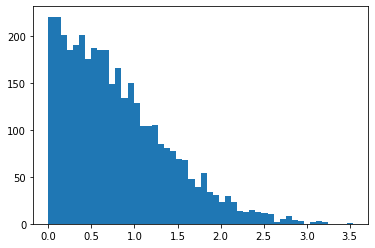

In [ ]:
plt.hist(rand_half,bins=50);
plt.show()

In [ ]:
import seaborn as sns
sns.kdeplot(rand_half)

0.8707323061773764
0.20671915533942642
0.9186109079379216
0.48841118879482914
0.6117438629026457
0.7659078564803156
0.5184179878729432
0.29680050157622195
0.18772122866125163
0.08074126876487486


In [ ]:
rand_half1=[]
for x in rand_exp:
    y = np.random.uniform()
    if math.exp(-0.5-0.5*x*x+x) > y:
        rand_half1.append(x)


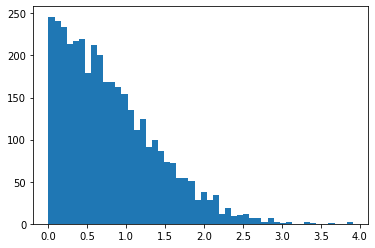

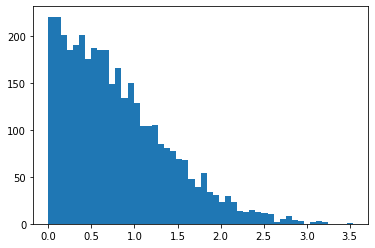

In [ ]:
plt.hist(rand_half1,bins=50);
plt.show()
plt.hist(rand_half,bins=50);
plt.show()

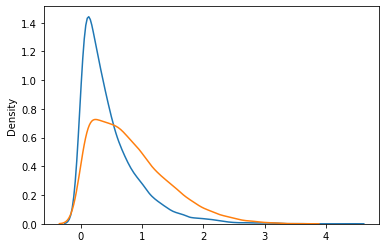

In [ ]:
import seaborn as sns
sns.kdeplot(rand_exp*math.sqrt(2/math.pi)*math.exp(-0.5))
sns.kdeplot(rand_half)

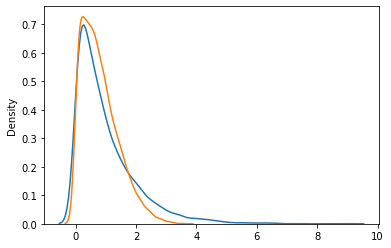

In [ ]:
import seaborn as sns
sns.kdeplot(rand_exp)
sns.kdeplot(rand_half)

### Generating Samples for Normal Distribution

The code utilizes the symmetry of the **normal distribution** to transform samples from the **half-normal distribution** into samples from the **normal distribution**.

1. **Half-Normal Distribution**:
   - The half-normal distribution is the absolute value of the normal distribution:
     $$
     X \sim \text{HalfNormal} \implies X = |Z|, \quad Z \sim \mathcal{N}(0, \sigma^2)
     $$

2. **Introducing Symmetry**:
   - To recover the full normal distribution, we randomly assign a sign + or - to each sample from the half-normal distribution. This is achieved by multiplying each sample by a factor that is either +1 or -1 with equal probability ($50\%$).

3. **Code Implementation**:
   - The random signs are generated using the following code:
     ```
     np.random.randint(0, 2, size=len(rand_half)) * 2 - 1
     ```
     This produces an array of random signs ($+1$ or $-1$).

   - Each sample from the half-normal distribution (`rand_half`) is then multiplied by the corresponding random sign to produce samples from the normal distribution:
     $$
     Z = S \cdot X, \quad S \in \{-1, +1\}, \quad X \sim \text{HalfNormal}
     $$
     where $Z$ represents the final normal distribution sample.

In [ ]:
normal_dist = (np.random.randint(0,2,size=len(rand_half))*2-1)*np.array(rand_half)

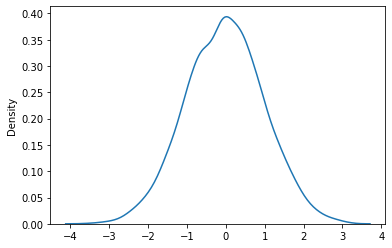

In [ ]:
sns.kdeplot(normal_dist)

In [ ]:
rand_half2 = []
X = np.random.rand(5000)
for i in X:
    y = np.random.rand()
    if (-math.log(y))>=(0.5*(math.log(i)+1)**2):
        rand_half2.append(-math.log(i))

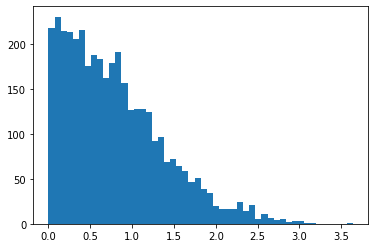

In [ ]:
plt.hist(rand_half2,bins=50);

In [ ]:
import pandas as pd
from statsmodels.nonparametric.kernel_regression import KernelReg


In [ ]:
dependent_var = '@_cbmi'
ind_var = ['wi_s','q304','q201I', 'q306c', 'q306d', 'q102', 'q201A', 'q116','q306l','q306n']
reg_train = pd.read_csv('data.csv' )
reg_train

,@_cbmi,wi_s,q304,q201I,q306c,q306d,q102,q201A,q116,q306l,q306n,state_weight_survey
0,17.718954,3.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.4,7.0,0.001210
1,20.040155,4.0,0.0,0.0,7.0,1.0,1.0,0.0,3.0,7.0,3.0,0.000851
2,14.299371,1.0,1.0,0.0,2.0,0.4,1.0,1.0,3.0,7.0,3.0,0.000901
3,19.881560,4.0,0.0,1.0,3.0,0.4,0.0,0.0,3.0,7.0,0.4,0.000930
4,16.924901,2.0,1.0,0.0,3.0,2.0,0.0,0.0,3.0,0.4,0.4,0.000947
...,...,...,...,...,...,...,...,...,...,...,...,...
595,18.658964,5.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.4,0.4,0.001090
596,19.666224,3.0,0.0,0.0,3.0,3.0,0.0,1.0,1.0,7.0,5.0,0.001131
597,17.318158,3.0,1.0,0.0,5.0,0.4,1.0,0.0,3.0,7.0,4.0,0.001074
598,19.905756,3.0,0.0,0.0,0.4,0.4,1.0,0.0,3.0,0.4,0.4,0.001071


In [ ]:

local_lin_reg = KernelReg(reg_train[dependent_var],reg_train[ind_var],'ouuccuuucc')
fitted_ll, margin_ll = local_lin_reg.fit()
bw_ll = local_lin_reg.bw
print(local_lin_reg.bw)
local_const = KernelReg(reg_train[dependent_var],reg_train[ind_var],'ouuccuuucc',reg_type = 'lc')
fitted_lc, margin_lc = local_const.fit()
bw_lc = local_const.bw
print(local_const.bw)

[ 1.90031937  0.74106167  0.13248323  0.89086399  2.76937895  0.423655
  0.53975571  0.62922874 30.9225373   8.42746269]
[0.74496653 0.25847212 0.06882867 0.70855964 1.89029046 0.39059156
 0.06753075 0.74766341 1.86961878 4.72221904]
